### KUKA 300 robotic arm dataset
#### datasource
structure: 
- from master thesis
- gear from paper flatness xxx
- q limitation from nononinear benchmark dataset

We finally would end up with the original model with no limitation on the torque and speed
- compare with q clipper/qd clipper/ combined

In [3]:
import roboticstoolbox as rtb
from roboticstoolbox.robot import DHRobot
from roboticstoolbox.robot.DHLink import RevoluteDH
import numpy as np
import matplotlib as plt
from scipy.io import loadmat
import numpy as np
import numpy as np
from roboticstoolbox import DHRobot, RevoluteDH
import roboticstoolbox as rtb
from spatialmath import SE3
import matplotlib.pyplot as plt

In [4]:
import roboticstoolbox as rtb
from roboticstoolbox.robot import DHRobot
from roboticstoolbox.robot.DHLink import RevoluteDH
import numpy as np
import matplotlib as plt
class myrobo(DHRobot):

    def __init__(self):
        links = [
                RevoluteDH(
                            d= 0.675,                                                  # link length (Denavit-Hartenberg-Notation) 
                            a= 0.350,                                                              # link offset (Denavit-Hartenberg-Notation)
                            alpha= -np.pi/2,     # 90                                                     # link twist (Denavit-Hartenberg-Notation)
                            I= [1.742e+1, 3.175e+1, 3.493e+1, 2.455e+0, -1.234e-1, -4.47056e+0],   # inertia tensor of link with respect to center of mass I = [L_xx, L_yy, L_zz, L_xy, L_yz, L_xz]
                            r= [-352.17374e-3, 169.90937e-3, -11.42400e-3],                        # distance of ith origin to center of mass [x,y,z] in link reference frame
                            m= 402.26,                                                             # mass of link 
                            Jm= 0.00923,                                                           # actuator inertia 
                            G= 212.76,                                                              # gear ratio
                            B= 0.0021517,                                                        # actuator viscous friction coefficient (actual value/G²)
                            Tc= [0.89302, -0.89302],                                               # actuator Coulomb friction coefficient for direction [-,+] (actual value/G)
                            qlim= [-90*np.pi/180, 90*np.pi/180],                                                 # maximum backward and forward link rotation
                            # offset= -90*np.pi/180,                                                       # compensation for DH-theta value -> offset on link rotation
                            offset= 0*np.pi/180,                                                       # compensation for DH-theta value -> offset on link rotation
                            flip=True
                        ),
                    RevoluteDH(
                            d= -0.189,
                            a= 1.15,
                            alpha= 0,           # 0
                            I= [7.293e+0, 8.742e+1, 8.712e+1, -6.600e-1, -9.125e-2, 3.924e+0],
                            r= [-705.34904e-3, -3.56655e-3, 0e-3],
                            m= 332.14,
                            Jm= 0.0118,
                            G= 203.52,
                            B= 0.0184437,
                            Tc= [2.45399, -2.45399],
                            qlim= [-30*np.pi/180, 40*np.pi/180],
                            offset= -90*np.pi/180

                        ),
                    RevoluteDH(
                            d= 0.189,
                            a= 0.041,
                            alpha= -np.pi/2,        # -90
                            I= [2.317e+1, 2.315e+1, 3.43410e+0, -2.545e-1, 1.27099e+0, 1.085e+0],
                            r= [-39.8514e-3, -43.0814e-3, -183.83108e-3],
                            m= 167.89,
                            Jm= 0.0118,
                            G= 192.75,
                            B= 0.0143936,
                            Tc= [2.33463, -2.33463],
                            qlim= [-110*np.pi/180, 40*np.pi/180],
                            offset= 90*np.pi/180
                              
                               ),
                    RevoluteDH(
                                d= -1,
                                a= 0,
                                alpha= np.pi/2,         # 90
                                I= [1.324e-1, 4.509e-2, 1.361e-1, 5.608e-7, 6.530e-3, -5.01236e-7],
                                r= [0.00055e-3, 121.91066e-3, 4.32167e-3],
                                m= 9.69,
                                Jm= 0.00173,
                                G= 156,
                                B= 0.0038455,
                                Tc= [0.60897, -0.60897],
                                qlim= [-180*np.pi/180, 180*np.pi/180],
                                offset= 0*np.pi/180
                               ),
                    RevoluteDH(
                                d= 0,
                                a= 0,
                                alpha= -np.pi/2,        # -90
                                I= [7.185e-1, 5.55113e-1, 4.384e-1, 3.801e-5, 1.519e-1, 1.056e-4],
                                r= [0.00454e-3, -49.96316e-3, -59.16827e-3],
                                m= 49.61,
                                Jm= 0.00173,
                                G= 156,
                                B= 0.0038455,
                                Tc= [0.60897, -0.60897],
                                qlim= [-90*np.pi/180, 90*np.pi/180],
                                offset= 0*np.pi/180
                               ),
                    RevoluteDH(
                                d= -0.24,
                                a= 0,
                                alpha= np.pi,           # 180
                                I= [3.880e-2, 1.323e-1, 1.681e-1, 2.635e-2, 1.590e-3, -3.322e-3],
                                r= [-66.63199e-3, 17.20624e-3, -16.63216e-3],
                                m= 9.18,
                                Jm= 0.00173,
                                G= 102.17,
                                B= 0.0050314,
                                Tc= [0.53832, -0.53832],
                                qlim= [-180*np.pi/180, 180*np.pi/180]
                               )
                ]
        
        super().__init__(links, name="KR300")
        self.payload(150)
        self.gravity = [0, 0, 9.81]
        self.qz = np.array([0, 0, 0, 0, 0, 0])  # zero angles
        self.qs = np.array([0, -np.pi/2, np.pi/2, 0, 0, 0])  # start at -90° pose
        self.qr = np.array([0, -1/2*np.pi, 3/4*np.pi, 0, np.pi/4, 0])  # ready pose Z-Shape
        self.qh = np.array([0, np.pi/2, 0, 0, 0, 0])  # hanging down
        self.qt = np.pi / 180

        
dof = 6
t = myrobo() 

In [5]:
import numpy as np
from scipy.integrate import cumtrapz
import matplotlib.pyplot as plt
# def integrate_acceleration(acceleration, init_velo, init_position, time):
#     # Compute velocity by integrating acceleration
#     print(acceleration,time,init_velo)
#     velocity = cumtrapz([acceleration], dx=time,axis=0, initial=[init_velo] )
#     # Compute position by integrating velocity
#     position = cumtrapz([velocity],dx=time,axis=0, initial=[init_position])
#     return velocity, position

# Initial conditions
import copy

def qdd_func(t, q, qd):
    # Define your acceleration function here.
    # For example, let's assume a simple linear system qdd = -k * q - b * qd
    k = 1.0
    b = 0.1
    return -k * q - b * qd


def rk4_step(qdd_func, t, q, qd, dt, qdd_prev):
    k1 = qdd_func(t, q, qd)
    k2 = qdd_func(t + 0.5 * dt, q + 0.5 * dt * qd, qd + 0.5 * dt * k1)
    k3 = qdd_func(t + 0.5 * dt, q + 0.5 * dt * (qd + 0.5 * dt * k1), qd + 0.5 * dt * k2)
    k4 = qdd_func(t + dt, q + dt * (qd + 0.5 * dt * k3), qd + dt * k3)
    
    qdd = (k1 + 2 * k2 + 2 * k3 + k4) / 6

    # Update position and velocity using the kinematic equations
    q_new = q + qd * dt + 0.5 * qdd_prev * (dt ** 2) + (1/6) * (qdd - qdd_prev) * (dt ** 2)
    qd_new = qd + 0.5 * (qdd + qdd_prev) * dt
    
    return q_new, qd_new, qdd

def phy_forword_kin(u_test,time_test, if_gear = False, if_clip_q = False,  if_clip_qd = False):
    q0 = np.array([0, 0, 0, 0, 0, 0])   # Initial joint positions
    qd0 = np.array([0, 0, 0, 0, 0, 0])  # Initial joint velocities
    torque = copy.deepcopy(u_test) # Example constant torques
    dof_num = 6


    q_lim_max =[]
    q_lim_min = []
    G_num = []
    for i in range(dof_num):
        if if_gear == True:
            torque[:,i]= torque[:,i]*t.links[i].G
            print("G multiplied")
            
        G_num.append(t.links[i].G)
        q_lim_min.append( t.links[i].qlim[0])
        q_lim_max.append( t.links[i].qlim[1])
        
        # q_lim_max[i] = t.links[i].qlim[1]
    print(q_lim_max)
    # Integrate the equations of motion
    q_list = []
    qd_list = []
    qdd_list = []
    q = q0
    qd = qd0
    qdd = qd0
    qdd_list.append(qdd)
    # qd_lim = [63.4, 61.7, 59.5 , 91.5,85.8,131.3]
    qd_lim = [63.4, 61.7, 59.5 , 91.5,85.8,131.3]

    qd_lim_min = []
    qd_lim_max = []

    for i in qd_lim:
        qd_lim_min.append(-i/180*np.pi)
        qd_lim_max.append(i/180*np.pi)
        print(qd_lim_min)
    time=0
    for index,dt in enumerate(np.diff(time_test,  axis=0)):
    

        # qdd = t.accel( q,qd  , torque[index]-t.friction(qd),gravity=[0,0,9.81])
        qdd = t.accel( q,qd  , torque[index],gravity=[0,0,9.81])
        has_nan = np.isnan(qdd).any()
        # if index==14:
        #     print(index,dt,q,qd,qdd,torque[index])
            
        if has_nan:
            print(index,dt,q,qd,qdd,torque[index])
        # if if_clip_q == True:
        #     q= np.clip(q,q_lim_min,q_lim_max )
        # if if_clip_qd == True:
        #     qd= np.clip(qd,qd_lim_min,qd_lim_max )
    
        
        q, qd, qdd = rk4_step(qdd_func, time, q, qd, dt, qdd)
        time+=dt
        if if_clip_qd == True:
            qd= np.clip(qd,qd_lim_min,qd_lim_max )

        if if_clip_q == True:
            q= np.clip(q,q_lim_min,q_lim_max )

        print(qdd,qd,q)
        # qd= np.clip(qd,qd_lim_min,qd_lim_max )
        # qd = qd + qdd * dt
        # q = q + qd * dt

        # q=(q+np.pi)%(np.pi*2)-np.pi

        q_list.append(q)
        qd_list.append(qd)
        qdd_list.append(qdd)

    q_array = np.array(q_list)
    qd_array = np.array(qd_list)
    qdd_array = np.array(qdd_list)
    return q_array, qd_array, qdd_array

def plot_two(gt, estimation, start_from = 0, length = 1000, joint_num = 0,):
    plt.figure(figsize=(10, 3))
    plt.plot(estimation[start_from:start_from+length,joint_num], label = "estimated")
    plt.plot(gt[start_from:start_from+length,joint_num],label = "ground_truth")
    plt.legend()
    plt.show()

### notation
- the original file an incorrect offsets
- correct offsets should be [0, -90, 90, 0, 0, 0]
- here, offset means when measured data is 0, the actual degree is 0+offset (for example, rotation limitation for joint 2 is [-120,+155],while in data it is [-190,65])

- qlim is from __Dataset and Baseline for an Industrial Robot Identification Benchmark__ table 7

In [6]:
file_name_train = "/home/ruiyuanli/dcscgpuserver1/DeepSSM_SysID/data/IndustRobo/inverse_identification_without_raw_data.mat"
df_industRobo =  loadmat(file_name_train)

u_train = df_industRobo["u_train"]
y_train = df_industRobo["y_train"]
u_test  = df_industRobo["u_test"]
y_test  = df_industRobo["y_test"]
time_test  = df_industRobo["time_test"]
time_train  = df_industRobo["time_train"]


u_train_position = np.asarray(u_train)[0:6,:].T/(180)*np.pi
u_train_speed = np.asarray(u_train)[6:12,:].T/(180)*np.pi
u_train_accel = np.asarray(u_train)[12:18,:].T/(180)*np.pi
y_train = np.asarray(y_train)[:,:].T
u_test_position = np.asarray(u_test)[0:6,:].T/(180)*np.pi
u_test_speed = np.asarray(u_test)[6:12,:].T/(180)*np.pi
u_test_accel = np.asarray(u_test)[12:18,:].T/(180)*np.pi

y_test = np.asarray(y_test)[:,:].T
time_test = np.asarray(time_test)[:,:].T
time_train = np.asarray(time_train)[:,:].T

torque = t.rne(u_test_position, u_test_speed, u_test_accel,gravity=t.gravity)
q_from_simT,qd_from_simT,qdd_from_simT = phy_forword_kin(torque,time_test, if_clip_qd = True, if_clip_q=True)

[2.5656340004316647, 1.4835298641951802, 1.0995574287564276, 6.108652381980153, 2.1380283336930535, 6.108652381980153]


### simulation dataset
Based on the given input_u (position, velocity, acceleration), use the following function to get the inverse kinematic torque:
```
torque = t.rne(u_test_position, u_test_speed, u_test_accel,gravity=t.gravity)
```

The torque is our new input, which will be used in phy-augmented and phy-guided model to get the simulation: joint position

By comparing the simulated position and the true position, we can find these two posirion match with each other 

```
q_from_simT,qd_from_simT,qdd_from_simT = phy_forword_kin(torque,time_test, if_clip_qd = True, if_clip_q=True)
```


__dataset__:

file_name_train = "/home/ruiyuanli/dcscgpuserver1/DeepSSM_SysID/data/IndustRobo/inverse_identification_without_raw_data.mat"

__input__: torque from t.rne(y_q, y_dq, y_ddq)

__output__: y_qd

(instead of using u_torque, we use torque from our designed model and simplier dynamic function)



veriation:
1. with incorrect offset (all 0)
2. with no mass information

#### generated torque and inverse kenematic torque in dataset

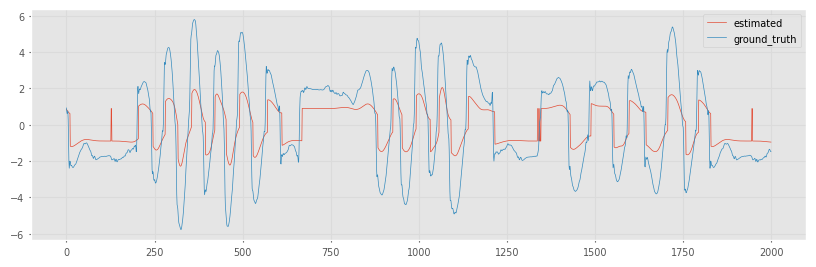

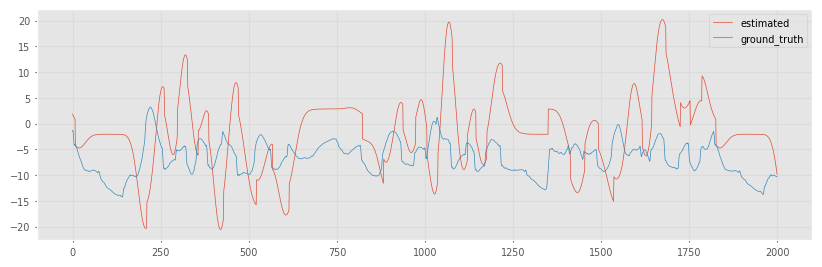

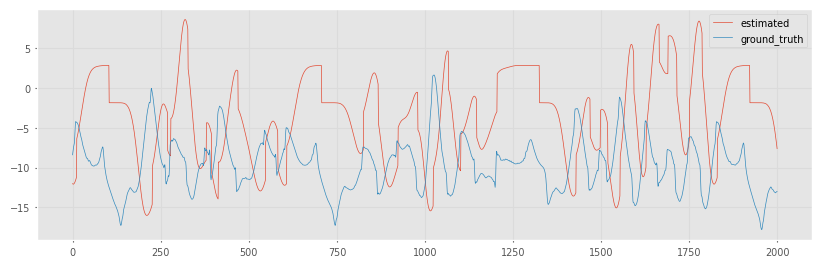

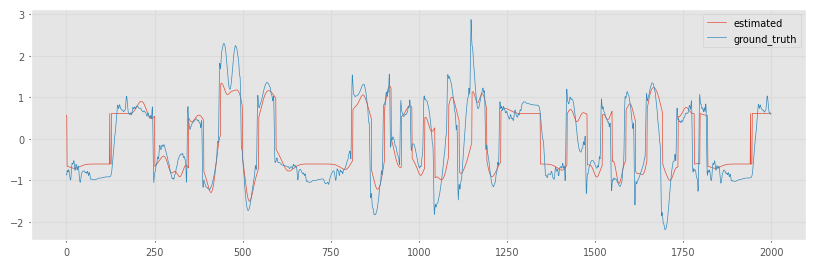

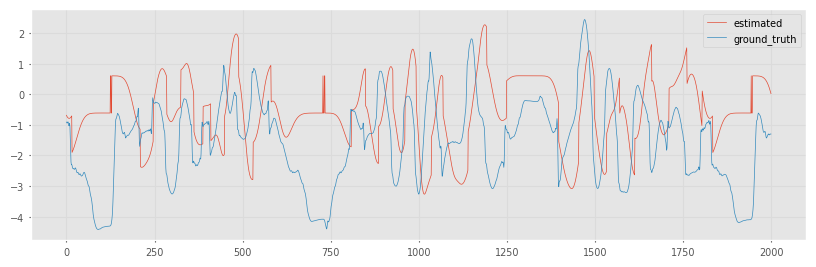

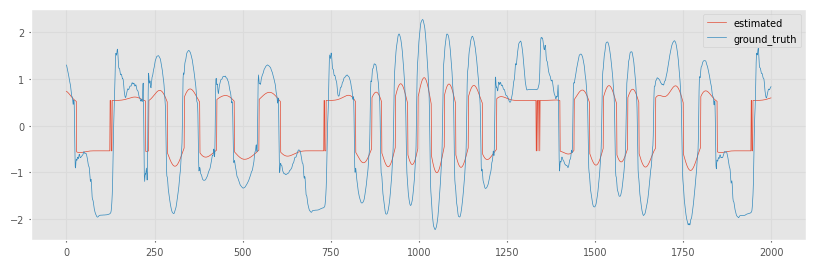

In [8]:
for i in range(6):
    plot_two(y_test,torque/t.links[i].G, start_from = 500, length = 2000, joint_num = i)
    # plot_two(u_train_torque,y_test, start_from = 500, length = 2000, joint_num = i)
    

#### check the simulated position (based on rne(q,dq,ddq)) and ground truth

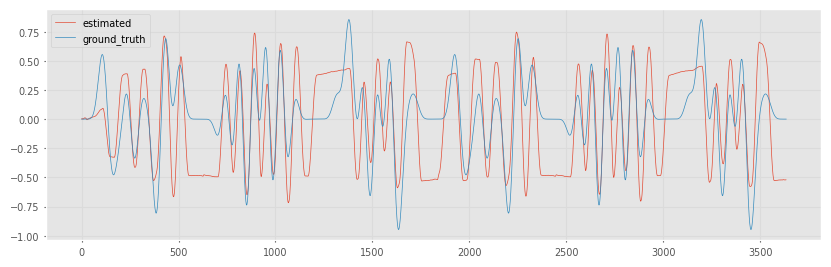

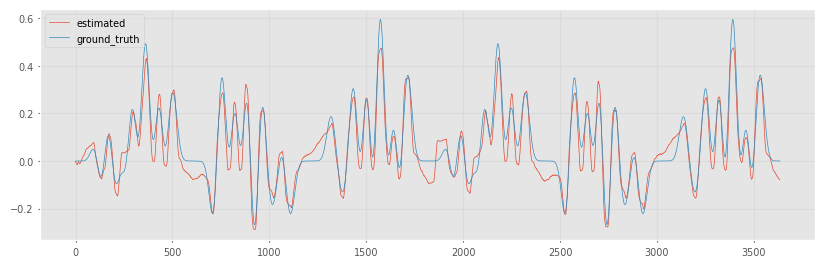

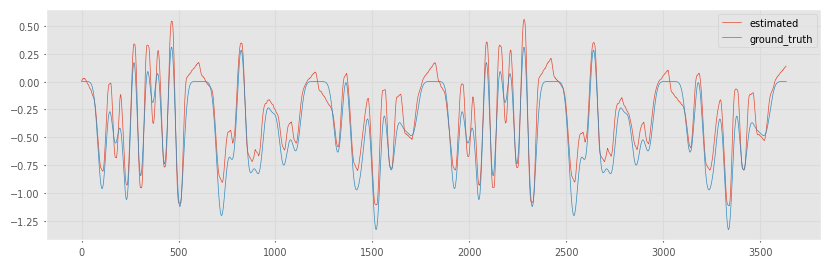

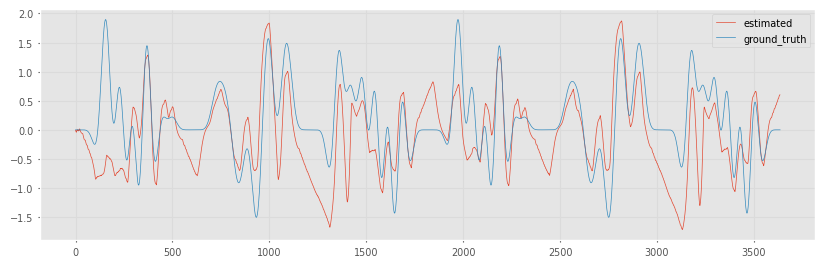

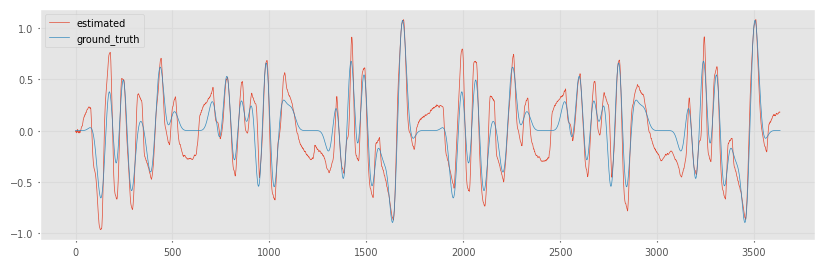

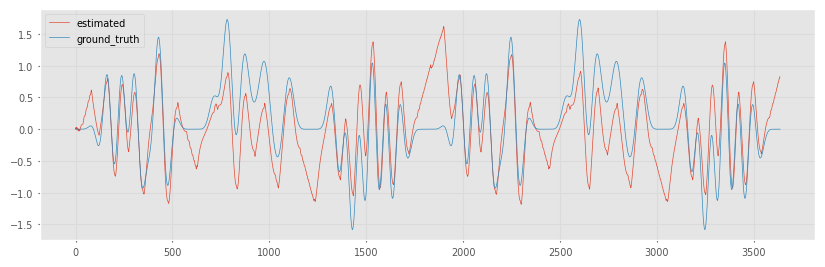

In [7]:
for i in range(6):
    plot_two(u_test_position, q_from_simT, start_from = 0, length = 30000, joint_num = i)

### notation
#### the related setings
##### industrobo
- learning rate: 1e-3 to = 1e-7 
- epoch 1000

#### industrobo simulation

- learning rate: 1e-3 to = 1e-7 
- epoch 1000

type:
1. 

##### lgssm
- learning rate: 1e-3 to = 1e-7 
- epoch 500